Notebook showing usage of the data detective package.

**References**
* https://facebook.github.io/prophet/

In [1]:
import detective.core as detective
import detective.helpers as helpers

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

To load from a local db, we just need the path

In [2]:
db_path = 'Users/robincole/Documents/Home-assistant_database/home-assistant_v2.db'
DB_URL = 'sqlite:////' + db_path

Alternatively, to load from a cloud database we load from a json file containing the url as the url contains our credentials and we want to lkeep these a secret. To learn how the Google CLoud SQL recorder can be setup checkout https://github.com/robmarkcole/HASS-Google-Cloud-SQL

In [3]:
# For cloud database with secret credentials, load from json. Time to load vaires, up to 3 mins.
filename = '/Users/robincole/Desktop/hass_db_url.json'
DB_URL = helpers.load_url(filename)

## Load the db data

We use the DataParser class to load data from the database. This class performs the SQL queries and parses the returned data. The class holds the master pandas dataframe master_df.

In [4]:
%%time
parser = detective.DataParser(DB_URL)

Querying the database, this could take a while
CPU times: user 5.29 s, sys: 1.14 s, total: 6.43 s
Wall time: 43.8 s


Lets create an object holding the numerical sensor

In [5]:
sensors_num = detective.NumericalSensors(parser.master_df)

We can access the list of sensor entities using the list_sensors attribute

In [6]:
sensors_num.entities[0:10]

['sensor.bme680humidity',
 'sensor.bme680pressure',
 'sensor.next_train_in',
 'sensor.living_room_temperature',
 'sensor.darksky_sensor_temperature',
 'sensor.mean_temperature',
 'sensor.bme680temperature',
 'sensor.bedroom_temperature',
 'sensor.next_train_to_wim',
 'sensor.network_up']

Now lets look at the dataframe

In [7]:
sensors_num.data.head()

entity,sensor.bayes_probability,sensor.bedroom_temperature,sensor.blink_blink_camera_percy_notifications,sensor.blink_blink_camera_percy_temperature,sensor.bme680air_qual,sensor.bme680humidity,sensor.bme680pressure,sensor.bme680temperature,sensor.cpu_load_total,sensor.darksky_sensor_precip_probability,...,sensor.mean_temperature,sensor.memory_usage_real,sensor.network_up,sensor.next_train_in,sensor.next_train_to_wim,sensor.robins_iphone_battery_level,sensor.speedtest_download,sensor.time_in_bed,sensor.volume_used_volume_1,sensor.work_to_home
last_changed,,,,,,,,,,,,,,,,,,,,,
2018-01-23 07:16:58.762162,0.2,18.19,1.0,18.0,7549489.0,45.957,1016.85,22.07,2.0,0.0,...,18.12,53.0,5.5,1.0,1.0,100.0,10.79,7.16,19.7,38.0
2018-01-23 07:16:58.910505,0.2,18.19,1.0,18.0,7549489.0,45.957,1016.85,22.07,2.0,0.0,...,18.12,53.0,5.5,1.0,1.0,100.0,10.79,0.00,19.7,38.0
2018-01-23 07:16:59.094701,0.2,18.19,1.0,18.0,7549489.0,45.957,1016.85,22.07,2.0,0.0,...,18.12,53.0,5.5,1.0,28.0,100.0,10.79,0.00,19.7,38.0
2018-01-23 07:17:04.256479,0.2,18.19,1.0,18.0,7549489.0,45.957,1016.85,22.07,2.0,0.0,...,18.12,53.0,5.5,1.0,28.0,100.0,10.79,0.00,19.7,38.0
2018-01-23 07:17:04.484865,0.2,18.19,1.0,18.0,7549489.0,45.957,1016.85,22.07,2.0,0.0,...,18.12,53.0,5.5,1.0,28.0,100.0,10.79,0.00,19.7,38.0


Lets now check for correlations in the data using the all_corrs() method

In [8]:
corrs = sensors_num.correlations()

In [9]:
corrs[(corrs['value'] > 0.5) | (corrs['value'] < -0.5)]

,value
sensor.next_train_to_wim-sensor.next_train_in,0.980353
sensor.bedroom_temperature-sensor.mean_temperature,0.898037
sensor.mean_temperature-sensor.blink_blink_camera_percy_temperature,0.793963
sensor.mean_temperature-sensor.living_room_temperature,0.788843
sensor.blink_blink_camera_percy_temperature-sensor.bedroom_temperature,0.718609
sensor.mean_temperature-sensor.hall_temperature,0.704991
sensor.bedroom_temperature-sensor.living_room_temperature,0.700514
sensor.robins_iphone_battery_level-sensor.home_to_waterloo,-0.559056
sensor.bedroom_temperature-sensor.darksky_sensor_temperature,-0.589847
sensor.darksky_sensor_temperature-sensor.iphone_battery_level,-0.673636


Unsurprisingly the mean temperature is strongly correlated with all of the temperature sensors. 

Interestingly my iphone battery level is somewhat inversely correlated with the travel time from home to waterloo, which gets longer late at night when my battery level is more likely to be low. 

#### Plot sensor data
Convenience to plot a sensor data.

In [10]:
to_plot = ['sensor.living_room_temperature',
           'sensor.bedroom_temperature',
           'sensor.darksky_sensor_temperature']

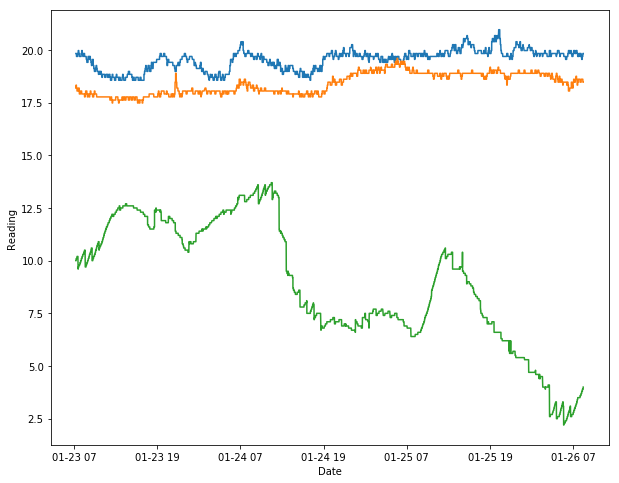

In [15]:
sensors_num.plot(to_plot)

And using pandas

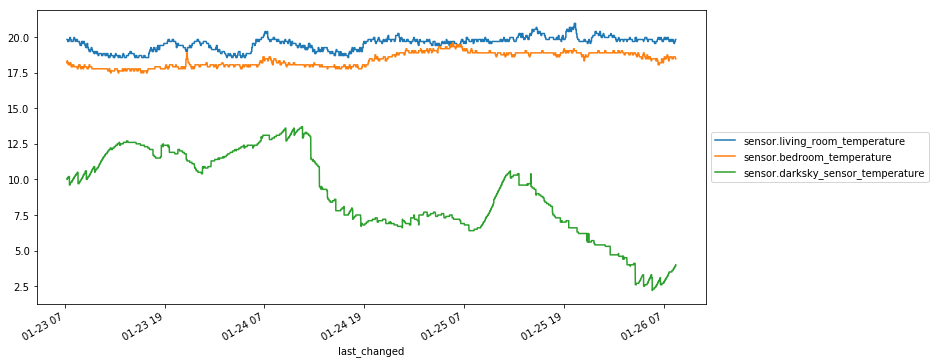

In [11]:
sensors_num.data[to_plot].plot(figsize = [12,6]).legend(loc='center left', bbox_to_anchor=(1, 0.5));

#### Pairplot
A seaborn pair plot to show correlations.

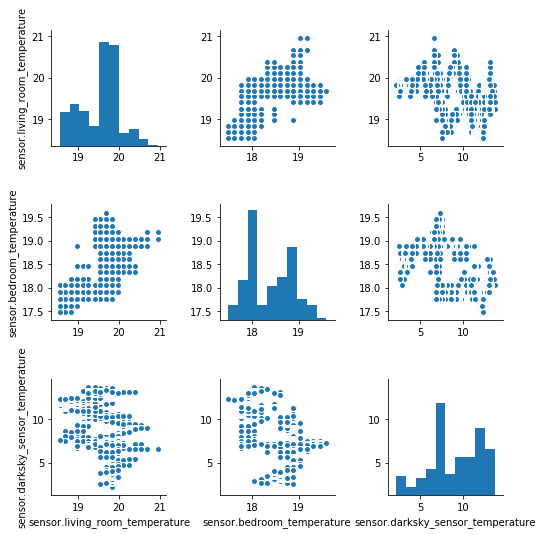

In [12]:
sns.pairplot(sensors_num.data[to_plot])

#### Prediction with prophet
Lets do some forecasting using prophet.

In [13]:
%%time
sensor = 'sensor.darksky_sensor_temperature'
model, future = parser.prophet_model(sensor, periods=60, freq='H')

AttributeError: 'DataParser' object has no attribute 'prophet_model'

In [14]:
model.plot(future)
plt.show()

NameError: name 'model' is not defined

In [ ]:
model.plot_components(future)
plt.show()

Clearly the daily trend is for the warmest temperatures at early afternoon